# All material ©2019, Alex Siegman

---

## There are a seemingly infinite number of different tools for data visualization in Python. For today, we're going to focus on Matplotlib and Seaborn. 

> Matplotlib is a standard, Python, 2D plotting library (https://matplotlib.org/) <br> 
> Seaborn is also a Python, data visualization library built atop Matplotlib (https://seaborn.pydata.org/)

In [105]:
import matplotlib.pyplot as plt # importing matplotlib.pyplot
import seaborn as sns # importing seaborn
sns.set(style="whitegrid") # just setting some aesthetics
import pandas as pd # importing pandas so we can work with our dataframes
%matplotlib inline 

# "%matplotlib inline" is a "magic function" in the Jupyter notebook. It ultimately means that
# the output of the plotting commands will be displayed within the Jupyter cell 
# below the code itself. 

In [106]:
data = pd.read_csv("SternTech_UserData.csv") # read in our csv 

In [107]:
data.head() # check the first five rows of our csv

,Unnamed: 0,id,company_size,age,sex,clicked_on_ad,ad_type,location,timestamp
0,0,081217b4-1cf5-4657-8287-6db1b75462e4,large,92,M,Yes,Business,MidWest,2018-08-26 06:00:27.124290
1,1,d0b45a01-b73d-4f8e-bfa8-c53ea75397f1,large,56,M,Yes,Culinary,SouthWest,2011-06-01 18:54:34.815634
2,2,1dc2e636-e19b-4d42-b228-df09cd009acb,large,20,F,No,Business,SouthEast,2013-07-16 00:24:47.888180
3,3,5d09d6d4-023e-4fa1-9559-89526679e885,large,55,F,Yes,Political,NorthWest,2010-06-25 12:13:51.369878
4,4,b69e54e3-fc89-4c0f-8bdb-280409db173e,medium,25,N,No,Tech,US,2010-09-22 07:53:12.454909


In [108]:
data = data.drop(data.columns[[0]],axis=1)

## Admittedly we don't have a lot of quantitative data in our set, so let's create some new fields:

In [109]:
# let's add a "years customer" column denoting how long a given user has been a customer

import random 

years_list = []

for i in range(0,50000):
    years = random.randint(1,18)
    years_list.append(years)
    
data['years_customer'] = years_list

# let's also add a "propensity to churn" column denoting the odds that someone cancels their subscription 

propensity_list = []

for i in range(0,50000): 
    propensity = random.randint(0,99)
    propensity_list.append(propensity)
    
data['churn_propensity'] = propensity_list

# and, a "monthly payment" column 
    
payment_list = []

for i in range(0,50000):
    payment = random.randint(15,200)
    payment_list.append(payment)
    
data['monthly_payment'] = payment_list



data.head()

,id,company_size,age,sex,clicked_on_ad,ad_type,location,timestamp,years_customer,churn_propensity,monthly_payment
0,081217b4-1cf5-4657-8287-6db1b75462e4,large,92,M,Yes,Business,MidWest,2018-08-26 06:00:27.124290,10,81,151
1,d0b45a01-b73d-4f8e-bfa8-c53ea75397f1,large,56,M,Yes,Culinary,SouthWest,2011-06-01 18:54:34.815634,10,46,119
2,1dc2e636-e19b-4d42-b228-df09cd009acb,large,20,F,No,Business,SouthEast,2013-07-16 00:24:47.888180,4,71,164
3,5d09d6d4-023e-4fa1-9559-89526679e885,large,55,F,Yes,Political,NorthWest,2010-06-25 12:13:51.369878,15,64,97
4,b69e54e3-fc89-4c0f-8bdb-280409db173e,medium,25,N,No,Tech,US,2010-09-22 07:53:12.454909,8,33,195


## An important note on grouping: 

In [110]:
data.groupby(['location']).groups.keys() # let's see the different locations we have in our dataset...

dict_keys(['Canada', 'Mexico', 'MidWest', 'NorthEast', 'NorthWest', 'SouthAmerica', 'SouthEast', 'SouthWest', 'US'])

In [111]:
data.groupby('location').first() # show us the first entry for each location

,id,company_size,age,sex,clicked_on_ad,ad_type,timestamp,years_customer,churn_propensity,monthly_payment
location,,,,,,,,,,
Canada,26753d01-eaf3-4906-a0e8-ec3364e336ab,large,87,N,Yes,Political,2018-08-07 01:14:12.732566,12,63,140
Mexico,e68c8268-aeee-4bbf-b097-9d3d0f7be367,startup,89,F,Yes,Tech,2011-02-03 04:28:16.388852,5,23,134
MidWest,081217b4-1cf5-4657-8287-6db1b75462e4,large,92,M,Yes,Business,2018-08-26 06:00:27.124290,10,81,151
NorthEast,346471ed-a4e7-46b3-9418-7dff84b50132,large,95,F,Yes,Culinary,2006-09-30 02:14:29.869183,16,19,80
NorthWest,5d09d6d4-023e-4fa1-9559-89526679e885,large,55,F,Yes,Political,2010-06-25 12:13:51.369878,15,64,97
SouthAmerica,ec5a6353-f816-4737-8fed-a8a620fe70c3,medium,39,N,No,Business,2015-08-26 08:07:55.115573,18,64,16
SouthEast,1dc2e636-e19b-4d42-b228-df09cd009acb,large,20,F,No,Business,2013-07-16 00:24:47.888180,4,71,164
SouthWest,d0b45a01-b73d-4f8e-bfa8-c53ea75397f1,large,56,M,Yes,Culinary,2011-06-01 18:54:34.815634,10,46,119
US,b69e54e3-fc89-4c0f-8bdb-280409db173e,medium,25,N,No,Tech,2010-09-22 07:53:12.454909,8,33,195


In [112]:
data.groupby('location')['age'].mean() # show us the mean age for each location 

location
Canada          58.444503
Mexico          57.991047
MidWest         58.907493
NorthEast       58.884084
NorthWest       58.120070
SouthAmerica    58.431022
SouthEast       58.334727
SouthWest       58.101925
US              58.439169
Name: age, dtype: float64

## Note that the result above is a Pandas Series – a one-dimensional array. (Think of a series as a single column in a data frame).

## The code below, on the other hand, will produce a Pandas DataFrame.

In [113]:
data.groupby('location')[['age']].mean()

,age
location,
Canada,58.444503
Mexico,57.991047
MidWest,58.907493
NorthEast,58.884084
NorthWest,58.120070
SouthAmerica,58.431022
SouthEast,58.334727
SouthWest,58.101925
US,58.439169


## It may seem like a negligible difference, but just like dtypes are important, how Python is viewing our data dictates what we can do with that data, and how we do it. 

In [114]:
data.groupby('location', as_index=False).agg({"age": "mean"}) # let's create a DataFrame without setting a new index

,location,age
0,Canada,58.444503
1,Mexico,57.991047
2,MidWest,58.907493
3,NorthEast,58.884084
4,NorthWest,58.120070
5,SouthAmerica,58.431022
6,SouthEast,58.334727
7,SouthWest,58.101925
8,US,58.439169


In [115]:
click_data = data[data['clicked_on_ad'] == 'Yes'].groupby('location')['age'].mean()

# get the mean age for users in each location who clicked on an ad

In [116]:
click_data

location
Canada          58.374086
Mexico          58.506531
MidWest         58.889761
NorthEast       58.608711
NorthWest       58.087780
SouthAmerica    58.131626
SouthEast       58.768459
SouthWest       58.310570
US              58.633770
Name: age, dtype: float64

In [117]:
type(click_data) # note that this is being stored as a series...

pandas.core.series.Series

## Our SternTech data was fine for practicing our analytics skills, but we're going to need a bit more substantial data to show the power of graphing in Python. So, let's read in a new CSV:

In [129]:
data = pd.read_csv("/Users/siegmanA/Desktop/NYU-Projects-in-Programming-Fall-2019/(Class 7) Data Visualization/titanic_train.csv") 

# this dataset comes from Kaggle and can be found here: https://www.kaggle.com/c/titanic/data

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Barplots 

In [130]:
data.head() # let's check in with our data again

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
type(data) # note that it's being stored as a dataframe...

pandas.core.frame.DataFrame

In [132]:
print(data.index.name) # and there is no set index

None


In [133]:
survivor_rate = pd.crosstab(data['Pclass'],data['Survived'],margins=True,margins_name='Total')

# let's see the surviers per passenger class

survivor_rate

Survived,0,1,Total
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
Total,549,342,891


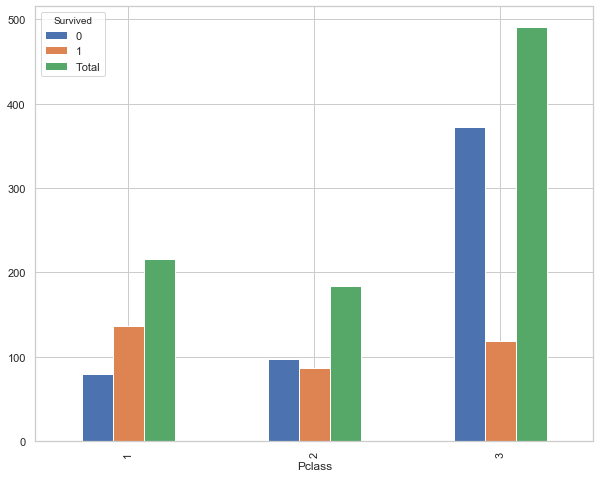

In [134]:
survivor_rate[:3].plot(kind='bar',figsize=(10,8))

# here we can do a simple bar plot from our newly created dataframe
# the [:3] is just so that we don't display the "Total"; try without the [:3] to see why

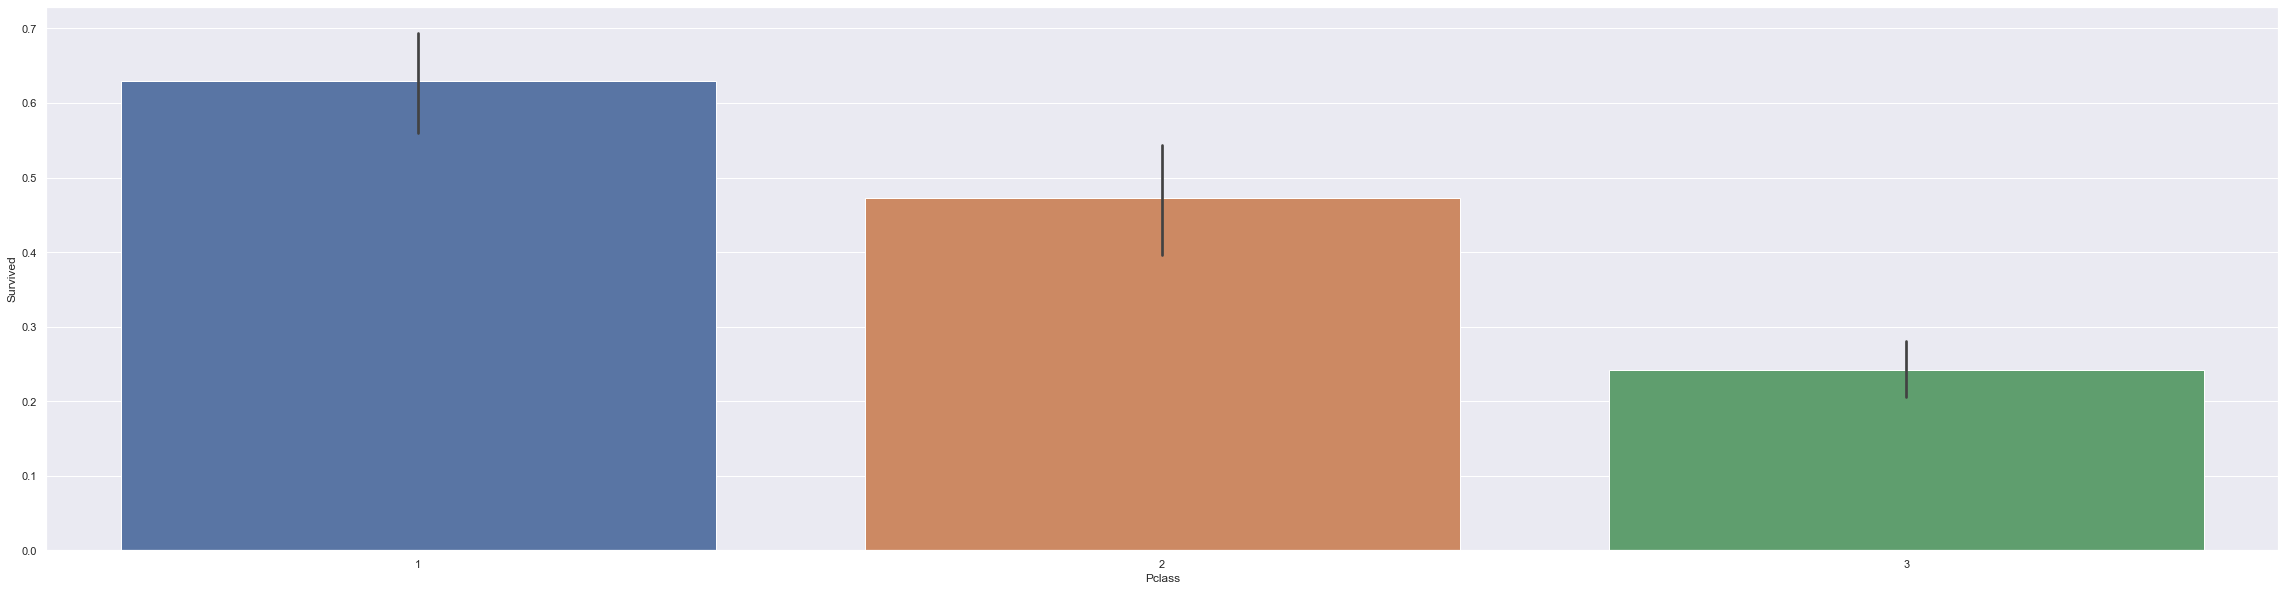

In [150]:
sns.set(rc={'figure.figsize':(40,10)})
sns.barplot(x='Pclass',y='Survived',data=data)

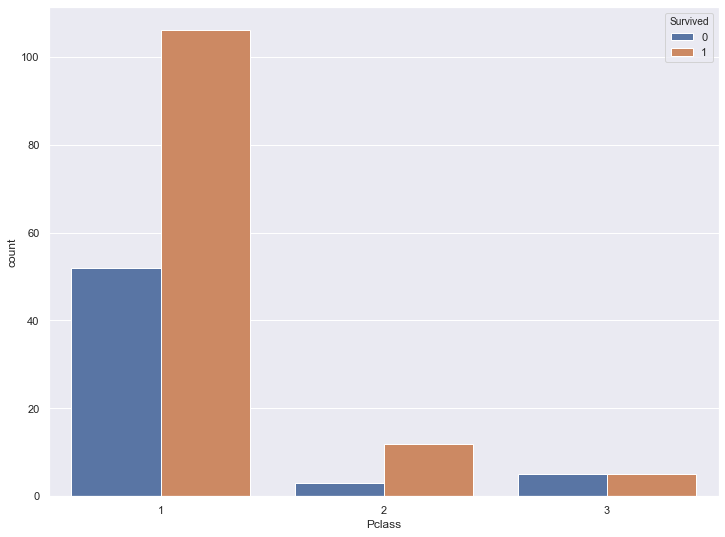

In [181]:
sns.countplot(x='Pclass',hue='Survived',data=data)

## Histograms

Text(0, 0.5, 'Frequency')

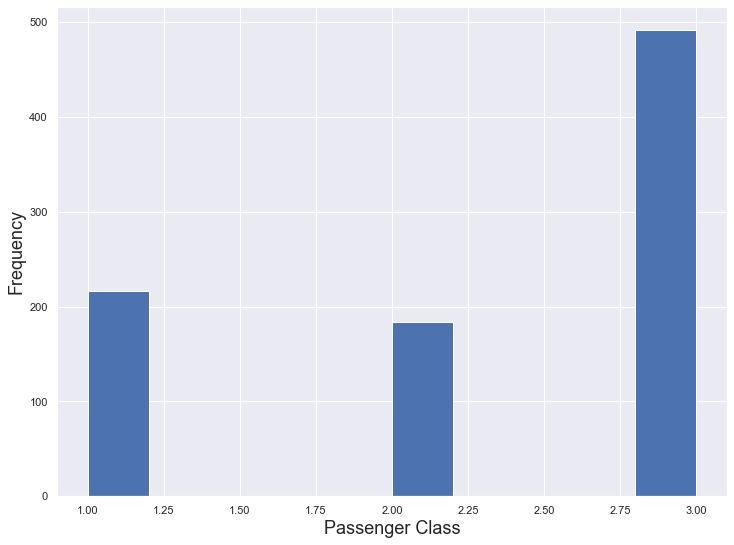

In [151]:
data['Pclass'].hist(bins=10,figsize=(12,9))
plt.xlabel("Passenger Class",fontsize=18)
plt.ylabel("Frequency",fontsize=18)

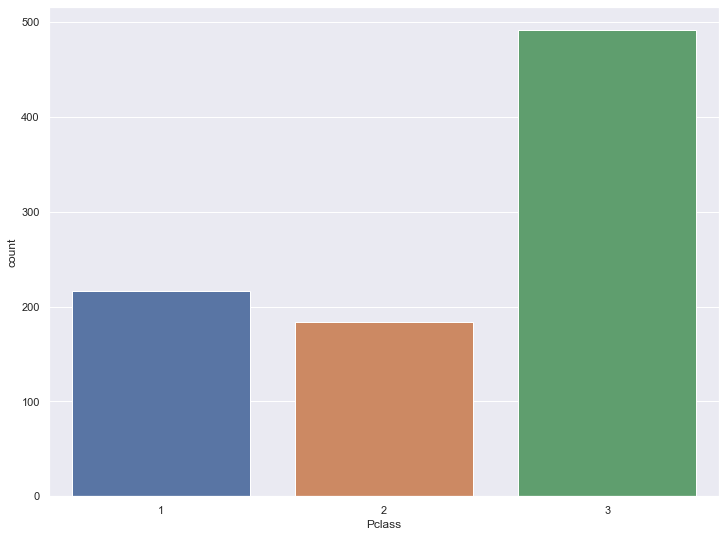

In [152]:
sns.set(rc={'figure.figsize':(12,9)})
sns.countplot(x='Pclass',data=data)

## Scatterplot

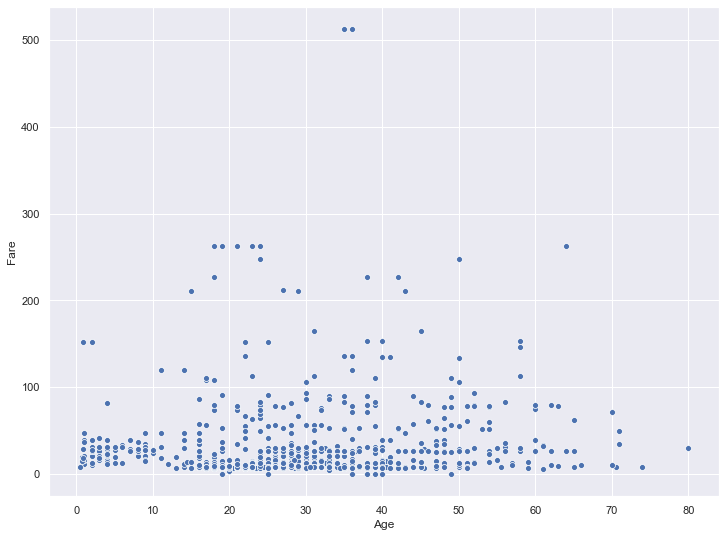

In [155]:
sns.scatterplot(x="Age",y="Fare",data=data)

## Density Plot

### *A density plot visualizes the distribution of data over a continuous interval or time period. Unlike histograms, there are no bins and thus it allows for a smoother distribution which let's a viewer more easily see the underlying shape of the distribution.*

/Users/siegmanA/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/siegmanA/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


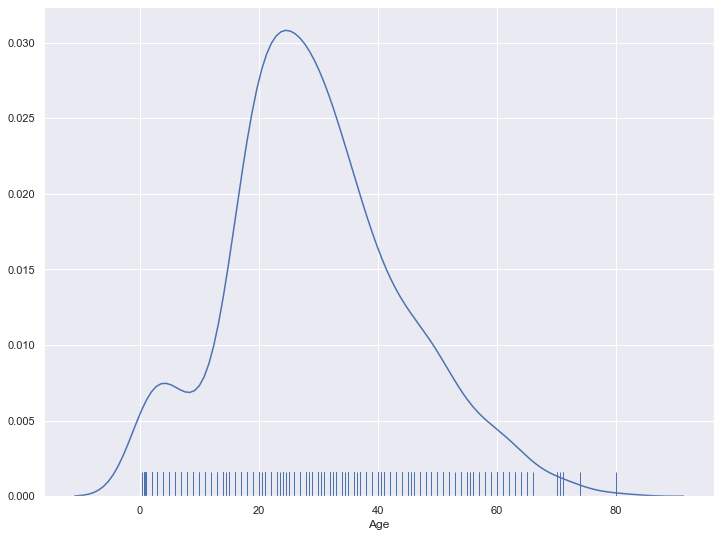

In [157]:
sns.distplot(data['Age'], hist=False, rug=True)

## Boxplot

### *A boxplot is a standard method of displaying the distribution of data, highlighting the minimum, first quartile, median, third quartile, and maximum value of a set. It's an excellent resource when you are looking for skew or outliers in your data.*

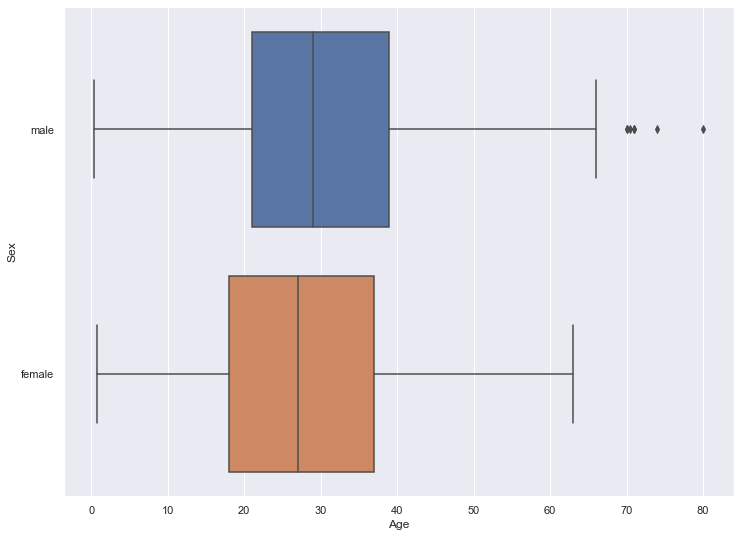

In [158]:
sns.boxplot(x="Age", y="Sex", data=data)

## Heatmaps

In [187]:
data2 = data[['Age','Fare','Survived','Pclass']]

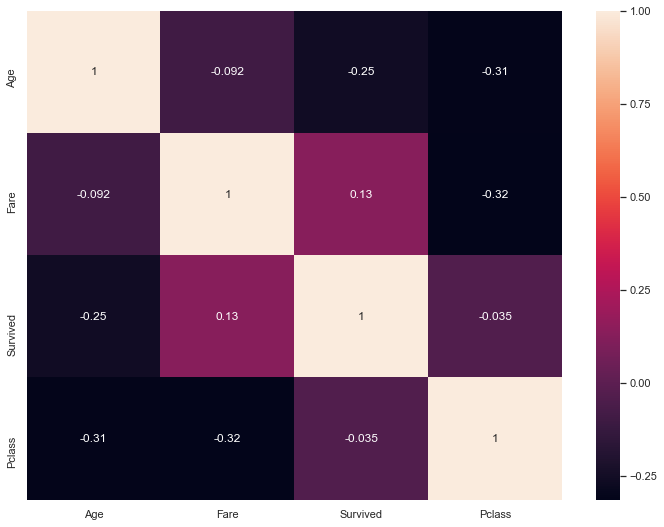

In [188]:
sns.heatmap(data2.astype(float).corr(),annot=True)